In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [4]:
data=pd.read_csv("C:\\Users\\OneDrive\\Desktop\\ml assign\\Mall_Customers.csv")

In [5]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


C:\Users\bhend\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

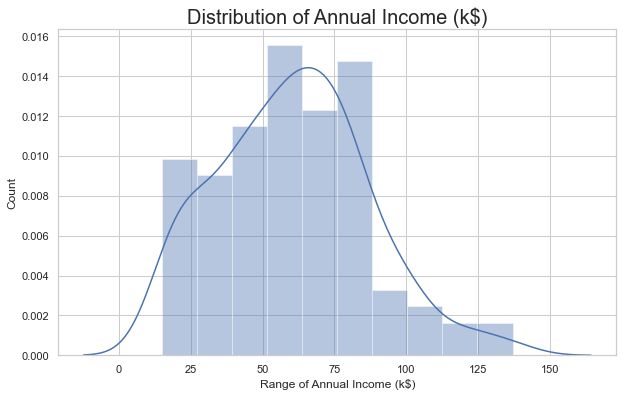

In [7]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

C:\Users\bhend\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

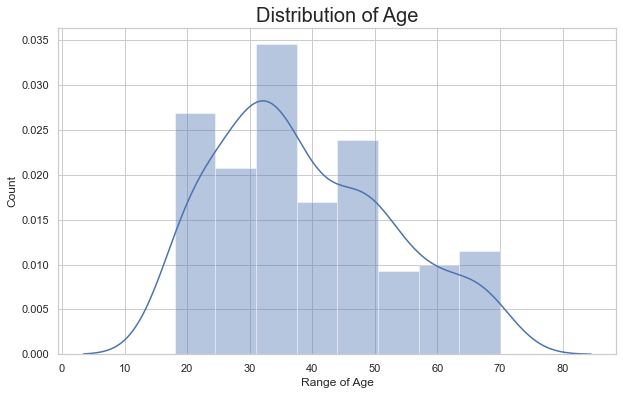

In [8]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

C:\Users\bhend\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

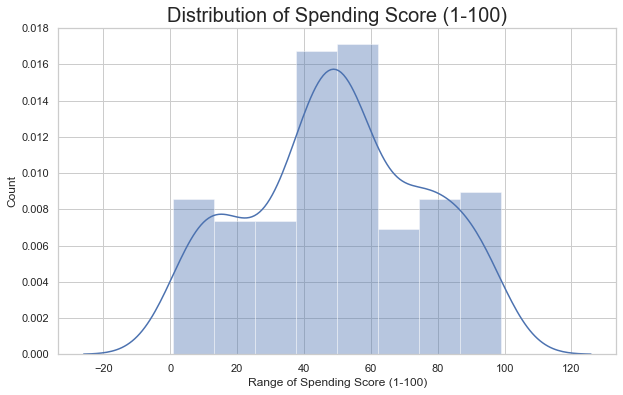

In [9]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

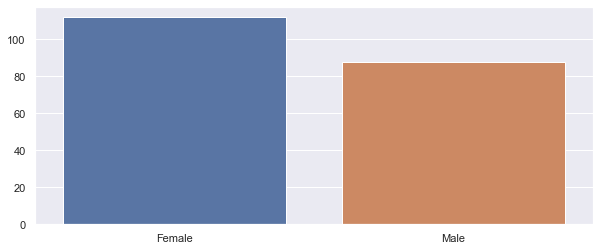

In [11]:
genders = data.Genre.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [13]:
df1=data[["CustomerID","Genre","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]
#The input data
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


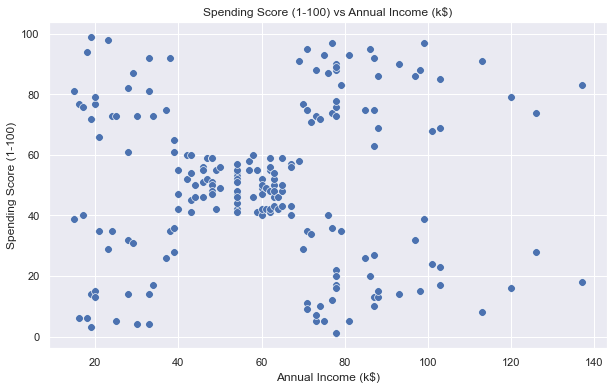

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)', data = X ,s = 60
)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [15]:
from sklearn.cluster import KMeans

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

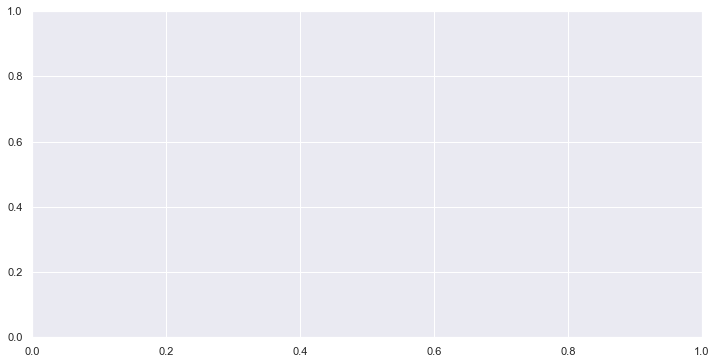

In [17]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
km.fit(X)
wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [18]:
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


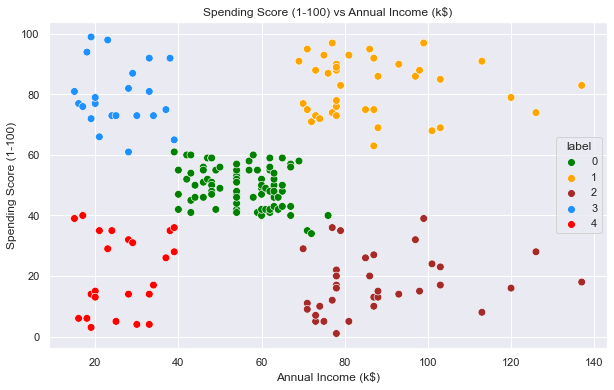

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",

palette=['green','orange','brown','dodgerblue','red'],

legend='full',data = df1 ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

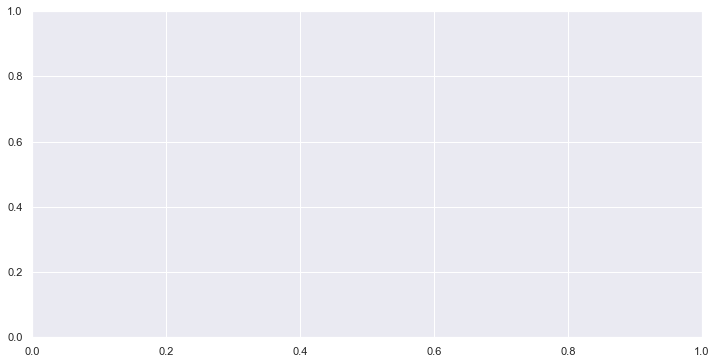

In [24]:
X2=data[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
kmeans.fit(X2)
wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [26]:
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
data["label"] = y2
#The data with labels
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,8
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1


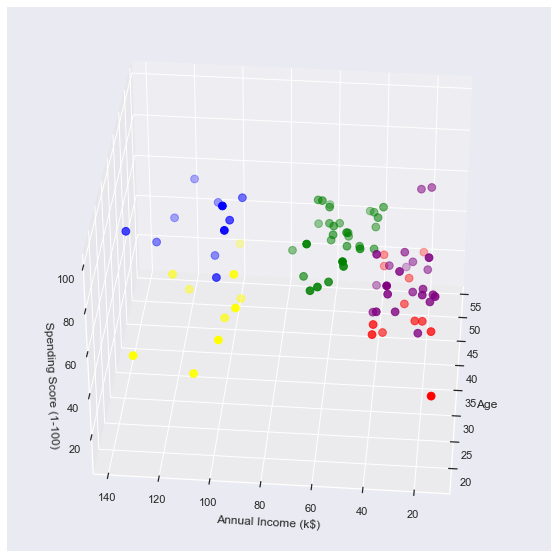

In [30]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["Annual Income (k$)"][data.label == 0],
data["Spending Score (1-100)"][data.label == 0], c='purple', s=60)
ax.scatter(data.Age[data.label == 1], data["Annual Income (k$)"][data.label == 1],
data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data["Annual Income (k$)"][data.label == 2],
data["Spending Score (1-100)"][data.label == 2], c='blue', s=60)
ax.scatter(data.Age[data.label == 3], data["Annual Income (k$)"][data.label == 3],
data["Spending Score (1-100)"][data.label == 3], c='green', s=60)
ax.scatter(data.Age[data.label == 4], data["Annual Income (k$)"][data.label == 4],
data["Spending Score (1-100)"][data.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [31]:
cust1=data[data["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print(" ")
cust2=data[data["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print(" ")
cust3=data[data["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print(" ")
cust4=data[data["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print(" ")
cust5=data[data["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("------------------------------------------")

Number of customer in 1st group= 12
They are - [ 1  5 17 19 21 27 29 39 43 45 49 50]
 
Number of customer in 2nd group= 11
They are - [180 182 184 186 188 190 192 194 196 198 200]
 
Number of customer in 3rd group= 23
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46]
 
Number of customer in 4th group= 30
They are - [ 47  51  55  56  57  60  67  72  77  78  80  82  84  86  90  93  94  97
  99 102 105 108 113 118 119 120 122 123 127 147]
 
Number of customer in 5th group= 10
They are - [181 183 185 187 189 191 193 195 197 199]
------------------------------------------
